<img src="Archivos/miad4.png" width=900x>

 # TAREA 1

**Departamento de Ingeniería Industrial.**

**Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics).**

**Modelos de Análisis Estadístico (MIIA 4100) - 202320.**

Por ningún motivo se recibirán entregas posteriores a la hora límite. En caso de no realizar la entrega la nota asignada será 0.

Notas: La entrega del taller deberá hacerse en un informe autocontenido incluyendo las **gráficas,interpretación y conclusiones**. Adicionalmente debe entregarse el código utilizado en un archivo ipynb, de considerar necesario comentar todas las partes del codigo que crean necesarias para el entendimiento del codigo.

Para todos los literales que lo requieran, se recomienda utilizar una significancia del 5% (confianza del 95%). En caso de utilizar otro nivel de significancia, hacerlo explícito en el informe.

______________________________________________________________________



## Ejercicio 1
(40%) La base de datos contenida en resultadosicfes.csv tiene información de los 
resultados obtenidos en 2019, estos resultados muestran todos los departamentos de 
Colombia, por favor tomar como muestra los resultados de los siguientes 5 departamentos; La 
Guajira, Valle, Atlántico, Bogotá (la cual en las estadísticas se tiene como departamento) y 
Huila. El objetivo es realizar un análisis exploratorio de los datos.


a. (20%) Identifique las variables continuas y para CADA UNA de éstas:
- Determine cuántos valores perdidos tiene cada una.
- Calcule la media, desviación estándar, máximo y mínimo.
- Identifique los departamentos donde los estudiantes obtuvieron un puntaje en matemáticas mayor a 55, un puntaje en lectura mayor a 60 y un puntaje en ingles mayor a 70 reemplace estos valores por valores perdidos. En lo que sigue trabaje con estas variables corregidas.<br> 
- Calcule nuevamente la media, desviación estándar, máximo, mínimo. Compare los resultados con los hallados los 2 literales anteriores y comente. 

In [1]:
#Importando paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando el dataframe
data = '/Users/santiagoromero/Documents/Maestria/Modelos Analisis Estadisticos/Tareas/Tarea 1 3/Archivos/resultadosicfes.csv'
data_frame = pd.read_csv(data, sep=';')
data_frame.head()

,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,M,MAGDALENA,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,47,48,37,30,54.0,208,25.0
1,M,BOGOTÃ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,60,65,54,59,63.0,299,83.0
2,M,BOLIVAR,Estrato 1,OFICIAL,URBANO,MAÃ‘ANA,66,57,41,74,64.0,299,84.0
3,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,62,54,61,73,53.0,309,88.0
4,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,63,57,55,57,52.0,288,78.0


In [3]:
#Filtrando por departamentos
departamentos = ['LA GUAJIRA','VALLE','ATLANTICO','BOGOTÃ\x81','HUILA']
df_departamentos = data_frame[data_frame['ESTU_DEPTO_RESIDE'].isin(departamentos)]

#Obteniendo las variables continuas
variables_continuas = []
data_types = data_frame.dtypes
for columna, dtype in data_types.items():
    if dtype != 'object':
        variables_continuas.append(columna)

#Creando un diccionario que almacena los valores perdidos
valores_perdidos = {}
for variable in variables_continuas:
    valores_perdidos[variable] = None

#Agregando los valores perdidos a cada variable
for i, variable in enumerate(valores_perdidos):
    valor_perdido = df_departamentos[variable].isna()
    perdidos = valor_perdido.sum()
    valores_perdidos[variable] = perdidos

df_valores_perdidos = pd.DataFrame([valores_perdidos]).transpose()
df_valores_perdidos.index.name = "Variable"
print('Cantidad de datos perdidos para cada variable categorica')
df_valores_perdidos

Cantidad de datos perdidos para cada variable categorica


,0
Variable,
PUNT_LECTURA_CRITICA,0
PUNT_MATEMATICAS,0
PUNT_C_NATURALES,0
PUNT_SOCIALES_CIUDADANAS,0
PUNT_INGLES,1
PUNT_GLOBAL,0
PERCENTIL_GLOBAL,1


In [4]:
#Descriptivos de cada variable continua
#Creando un diccionario que almacena los estadisticos de cada variable
descriptivos = {}
for variable in variables_continuas:
    descriptivos[variable] = []

for i, variable in enumerate(variables_continuas):
    datos = df_departamentos[variable].describe().loc[['mean', 'std', 'max', 'min']]
    descriptivos[variable] = datos
    
df_desciptivos = pd.DataFrame(descriptivos).transpose()
df_desciptivos

,mean,std,max,min
PUNT_LECTURA_CRITICA,53.380226,10.416497,100.0,0.0
PUNT_MATEMATICAS,51.817262,11.876710,100.0,0.0
PUNT_C_NATURALES,49.546606,10.752327,100.0,0.0
PUNT_SOCIALES_CIUDADANAS,47.635641,12.228414,100.0,0.0
PUNT_INGLES,50.693926,12.870041,100.0,0.0
PUNT_GLOBAL,253.013211,51.465233,477.0,0.0
PERCENTIL_GLOBAL,53.874037,28.723295,100.0,1.0


In [5]:
df_departamentos

,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
1,M,BOGOTÃ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,60,65,54,59,63.0,299,83.0
3,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,62,54,61,73,53.0,309,88.0
4,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,63,57,55,57,52.0,288,78.0
5,M,ATLANTICO,-,NO OFICIAL,URBANO,NOCHE,49,29,41,41,35.0,198,19.0
6,M,VALLE,Estrato 4,NO OFICIAL,URBANO,MAÃ‘ANA,76,70,70,68,72.0,355,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546193,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,TARDE,70,66,60,63,61.0,322,92.0
546195,F,BOGOTÃ,Estrato 2,OFICIAL,URBANO,TARDE,62,53,54,56,49.0,278,73.0
546202,F,HUILA,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,100,73,70,72,84.0,396,100.0
546208,M,BOGOTÃ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,75,73,72,67,74.0,360,99.0


In [6]:
#Identifique los departamentos donde los estudiantes obtuvieron un puntaje en matemáticas mayor a 55, un puntaje en lectura mayor a 60 y un puntaje en ingles mayor a 70 reemplace estos valores por valores perdidos

#Puntajes
puntaje_matematicas = 55
puntaje_lectura = 60
puntaje_ingles = 70

#Creando filtro y generando nuevo dataframe
filtro_matematicas = df_departamentos['PUNT_MATEMATICAS'] > puntaje_matematicas
filtro_lectura = df_departamentos['PUNT_LECTURA_CRITICA'] > puntaje_lectura
filtro_ingles = df_departamentos['PUNT_INGLES'] > puntaje_ingles

df_puntajes = df_departamentos[filtro_matematicas & filtro_lectura & filtro_ingles]
df_puntajes

,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
6,M,VALLE,Estrato 4,NO OFICIAL,URBANO,MAÃ‘ANA,76,70,70,68,72.0,355,99.0
61,M,ATLANTICO,Estrato 4,NO OFICIAL,URBANO,COMPLETA,62,72,46,67,81.0,316,90.0
79,M,BOGOTÃ,Estrato 4,NO OFICIAL,URBANO,MAÃ‘ANA,62,56,68,65,82.0,321,92.0
211,F,ATLANTICO,Estrato 2,OFICIAL,URBANO,MAÃ‘ANA,63,71,69,81,100.0,366,99.0
352,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,TARDE,71,56,62,59,76.0,315,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546103,F,BOGOTÃ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,65,75,65,65,75.0,340,96.0
546141,F,ATLANTICO,Estrato 2,OFICIAL,URBANO,UNICA,70,68,66,71,71.0,345,97.0
546202,F,HUILA,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,100,73,70,72,84.0,396,100.0
546208,M,BOGOTÃ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,75,73,72,67,74.0,360,99.0


In [7]:
df_drop = df_departamentos.drop(df_departamentos[filtro_matematicas&filtro_lectura&filtro_ingles].index, inplace=False)

In [8]:
df_drop

,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
1,M,BOGOTÃ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,60,65,54,59,63.0,299,83.0
3,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,62,54,61,73,53.0,309,88.0
4,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,MAÃ‘ANA,63,57,55,57,52.0,288,78.0
5,M,ATLANTICO,-,NO OFICIAL,URBANO,NOCHE,49,29,41,41,35.0,198,19.0
12,M,BOGOTÃ,Estrato 4,NO OFICIAL,URBANO,MAÃ‘ANA,64,56,59,60,68.0,302,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546184,F,VALLE,Estrato 2,NO OFICIAL,URBANO,MAÃ‘ANA,49,41,46,39,41.0,218,32.0
546185,F,BOGOTÃ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,54,62,49,42,53.0,259,61.0
546188,M,HUILA,Estrato 2,OFICIAL,RURAL,COMPLETA,65,54,60,61,38.0,292,80.0
546193,M,BOGOTÃ,Estrato 3,OFICIAL,URBANO,TARDE,70,66,60,63,61.0,322,92.0


In [9]:
datos_faltantes = df_drop.isna().sum()
datos_faltantes

ESTU_GENERO                 0
ESTU_DEPTO_RESIDE           0
FAMI_ESTRATOVIVIENDA        0
COLE_NATURALEZA             0
COLE_AREA_UBICACION         0
COLE_JORNADA                0
PUNT_LECTURA_CRITICA        0
PUNT_MATEMATICAS            0
PUNT_C_NATURALES            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_INGLES                 1
PUNT_GLOBAL                 0
PERCENTIL_GLOBAL            1
dtype: int64

In [10]:
#Creando un diccionario que almacena los valores perdidos
valores_perdidos_puntajes_drop = {}
for variable in variables_continuas:
    valores_perdidos_puntajes_drop[variable] = None

#Agregando los valores perdidos a cada variable
for i, variable in enumerate(valores_perdidos_puntajes_drop):
    valor_perdido= df_drop[variable].isna()
    perdidos = valor_perdido.sum()
    valores_perdidos[variable] = perdidos
    
df_perdidos_puntajes = pd.DataFrame([valores_perdidos_puntajes_drop]).transpose()
df_perdidos_puntajes

,0
PUNT_LECTURA_CRITICA,None
PUNT_MATEMATICAS,None
PUNT_C_NATURALES,None
PUNT_SOCIALES_CIUDADANAS,None
PUNT_INGLES,None
PUNT_GLOBAL,None
PERCENTIL_GLOBAL,None


In [11]:
#Descriptivos de cada variable continua
#Creando un diccionario que almacena los estadisticos de cada variable
descriptivos_puntajes = {}
for variable in variables_continuas:
    descriptivos_puntajes[variable] = []

for i, variable in enumerate(variables_continuas):
    datos = df_drop[variable].describe().loc[['mean', 'std', 'max', 'min']]
    descriptivos_puntajes[variable] = datos
    
df_desciptivos_puntajes = pd.DataFrame(descriptivos_puntajes).transpose()
df_desciptivos_puntajes

,mean,std,max,min
PUNT_LECTURA_CRITICA,52.314750,9.794356,100.0,0.0
PUNT_MATEMATICAS,50.604052,11.119918,100.0,0.0
PUNT_C_NATURALES,48.383691,9.939239,100.0,0.0
PUNT_SOCIALES_CIUDADANAS,46.331851,11.359774,100.0,0.0
PUNT_INGLES,48.916545,11.125430,100.0,0.0
PUNT_GLOBAL,246.854494,46.735324,442.0,0.0
PERCENTIL_GLOBAL,51.066829,27.456461,100.0,1.0


In [12]:
# Compare los resultados con los hallados los 2 literales anteriores y comente. 
columnas_df_descriptivos = ['Media 1', 'Std 1', 'Max 1', 'Min 1', 'Media 2', 'Std 2', 'Max 2', 'Min 2']
data_frame_descriptivos = pd.concat([df_desciptivos, df_desciptivos_puntajes], axis=1)
data_frame_descriptivos.columns = columnas_df_descriptivos
data_frame_descriptivos

##TODO_ incluir columnas de variabilidad

,Media 1,Std 1,Max 1,Min 1,Media 2,Std 2,Max 2,Min 2
PUNT_LECTURA_CRITICA,53.380226,10.416497,100.0,0.0,52.314750,9.794356,100.0,0.0
PUNT_MATEMATICAS,51.817262,11.876710,100.0,0.0,50.604052,11.119918,100.0,0.0
PUNT_C_NATURALES,49.546606,10.752327,100.0,0.0,48.383691,9.939239,100.0,0.0
PUNT_SOCIALES_CIUDADANAS,47.635641,12.228414,100.0,0.0,46.331851,11.359774,100.0,0.0
PUNT_INGLES,50.693926,12.870041,100.0,0.0,48.916545,11.125430,100.0,0.0
PUNT_GLOBAL,253.013211,51.465233,477.0,0.0,246.854494,46.735324,442.0,0.0
PERCENTIL_GLOBAL,53.874037,28.723295,100.0,1.0,51.066829,27.456461,100.0,1.0


Al retirar los estudiantes que cumplen con los puntajes en matematicas mayor a 55, lectura mayor a 60 e ingles 70. No se observa una variación significativa entre los estadisticos de Media y Desviación Estándar (2% en promedio), para la variable de Puntaje Global (PUNT_GLOBAL) si se observa una variabilidad del 8%. Esto puede darse debido a que los estudiantes retirados de la base solo represetan el 6.30% del total después de haber filtrado los departamentos de interés.

b. (5%) Compare en una tabla los puntajes de matemáticas, lectura y ciencias naturales, e ilustre gráficamente con gráficas de caja para cada una de las materias. Comente.

In [13]:
# Tabla dinamica de la media de los puntajes 
tabla_dinamica_media = pd.pivot_table(df_drop, values=['PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_LECTURA_CRITICA'], index='ESTU_DEPTO_RESIDE', aggfunc='mean')
tabla_dinamica_media    

,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
ESTU_DEPTO_RESIDE,,,
ATLANTICO,46.491359,50.492372,48.268074
BOGOTÃ,50.420611,54.277963,53.141881
HUILA,48.836932,51.800309,50.973252
LA GUAJIRA,42.755337,46.656582,44.458728
VALLE,46.969106,51.348434,48.692287


In [14]:
# Tabla dinamica de la desviación estándar de los puntajes 
tabla_dinamica_std = pd.pivot_table(df_drop, values=['PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_LECTURA_CRITICA'], index='ESTU_DEPTO_RESIDE', aggfunc='std')
tabla_dinamica_std    

,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS
ESTU_DEPTO_RESIDE,,,
ATLANTICO,10.169579,10.206510,11.108635
BOGOTÃ,9.250787,8.993710,10.433994
HUILA,10.169297,9.795412,11.280765
LA GUAJIRA,9.523380,10.194932,11.049190
VALLE,10.056045,9.934516,11.081159


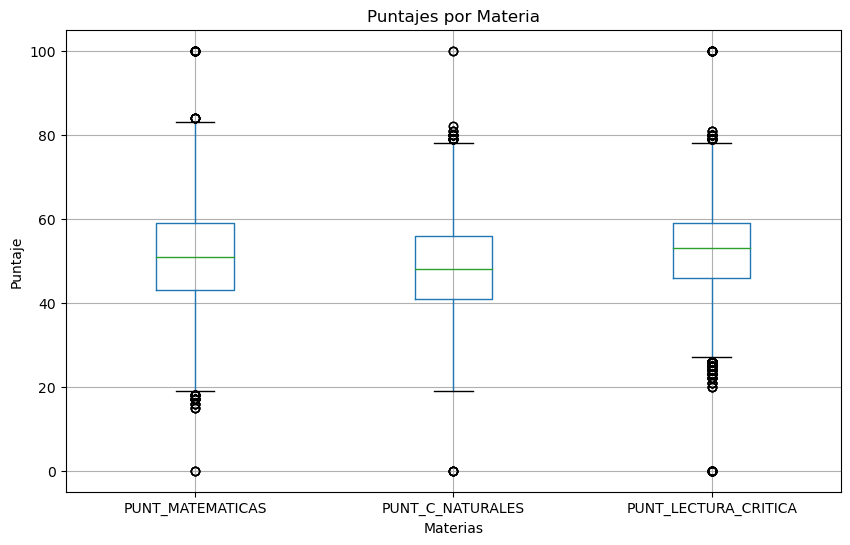

In [15]:
plt.figure(figsize=(10, 6))
df_drop.boxplot(column=['PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_LECTURA_CRITICA'])
plt.title('Puntajes por Materia')
plt.ylabel('Puntaje')
plt.xlabel('Materias')
plt.show()

Los estudiantes presentan un mejor desempeño en la materia de lectura crítica, toda vez que, al oscilar entre minimos de cero y máximo de 100 al igual que las demá materias, tanto su media, como su tercer cuartil son superiores a las demás materias. No obstante, también es la materia con mayor cantidad de estudiantes que obtuvieron datos atípicos por debajo del primer cuartil.

Tambien se observa que la dispersión de los puntajes de matemáticas es mayor que en las demás materias, mientras que en Lectura Crítica se observa la menor dispersión.

c. (5%) Identifique el departamento que tiene los puntajes globales más altos. Identifique el que tiene los mejores puntajes en matemáticas.

In [16]:
puntajes_altos = df_drop[['ESTU_DEPTO_RESIDE','PUNT_GLOBAL']]
df_puntajes_altos = puntajes_altos.groupby(['ESTU_DEPTO_RESIDE']).describe()
df_puntajes_altos

PUNT_GLOBAL                                             \
                        count        mean        std   min    25%    50%   
ESTU_DEPTO_RESIDE                                                          
ATLANTICO             30611.0  236.283297  47.367086  44.0  200.0  233.0   
BOGOTÃ               75697.0  258.256761  43.266914  75.0  227.0  260.0   
HUILA                 13571.0  246.137352  47.118972  21.0  210.0  244.0   
LA GUAJIRA             8759.0  216.933326  45.099298  11.0  182.0  211.0   
VALLE                 37548.0  239.724672  46.628659   0.0  205.0  238.0   

                                 
                     75%    max  
ESTU_DEPTO_RESIDE                
ATLANTICO          271.0  403.0  
BOGOTÃ            290.0  442.0  
HUILA              281.0  408.0  
LA GUAJIRA         247.0  370.0  
VALLE              273.0  407.0

In [17]:
puntaje_valle = puntajes_altos[puntajes_altos['ESTU_DEPTO_RESIDE']=='VALLE']
df_puntaje_valle = puntaje_valle.drop(columns=['ESTU_DEPTO_RESIDE'])

puntaje_guajira = puntajes_altos[puntajes_altos['ESTU_DEPTO_RESIDE']=='LA GUAJIRA']
df_puntaje_guajira = puntaje_guajira.drop(columns=['ESTU_DEPTO_RESIDE'])

puntaje_atlantico = puntajes_altos[puntajes_altos['ESTU_DEPTO_RESIDE']=='ATLANTICO']
df_puntaje_atlantico = puntaje_atlantico.drop(columns=['ESTU_DEPTO_RESIDE'])

puntaje_bogota = puntajes_altos[puntajes_altos['ESTU_DEPTO_RESIDE']=='BOGOTÃ\x81']
df_puntaje_bogota = puntaje_bogota.drop(columns=['ESTU_DEPTO_RESIDE'])

puntaje_huila = puntajes_altos[puntajes_altos['ESTU_DEPTO_RESIDE']=='HUILA']
df_puntaje_huila = puntaje_huila.drop(columns=['ESTU_DEPTO_RESIDE'])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
scaler = StandardScaler()

df_normalized_1c_valle = pd.DataFrame(scaler.fit_transform(df_puntaje_valle), columns=df_puntaje_valle.columns)
df_valle_descriptivos = df_normalized_1c_valle.describe().transpose()

df_normalized_1c_guajira = pd.DataFrame(scaler.fit_transform(df_puntaje_guajira), columns=df_puntaje_guajira.columns)
df_guajira_descriptivos = df_normalized_1c_guajira.describe().transpose()

df_normalized_1c_atlantico = pd.DataFrame(scaler.fit_transform(df_puntaje_atlantico), columns=df_puntaje_atlantico.columns)
df_atlantico_descriptivos = df_normalized_1c_atlantico.describe().transpose()

df_normalized_1c_bogota = pd.DataFrame(scaler.fit_transform(df_puntaje_bogota), columns=df_puntaje_bogota.columns)
df_bogota_descriptivos = df_normalized_1c_bogota.describe().transpose()

df_normalized_1c_huila = pd.DataFrame(scaler.fit_transform(df_puntaje_huila), columns=df_puntaje_huila.columns)
df_huila_descriptivos = df_normalized_1c_huila.describe().transpose()


In [22]:
puntaje_dep=['ATLANTICO', 'LA GUAJIRA','HUILA','VALLE','BOGOTÃ\x81']

df_puntajes_descriptivos_normalizados = pd.concat([df_atlantico_descriptivos,df_guajira_descriptivos,df_huila_descriptivos,df_valle_descriptivos,df_bogota_descriptivos])
df_puntajes_descriptivos_normalizados.index = puntaje_dep
df_puntajes_descriptivos_normalizados

,count,mean,std,min,25%,50%,75%,max
ATLANTICO,30611.0,5.663730e-17,1.000016,-4.059495,-0.766015,-0.069317,0.732941,3.519732
LA GUAJIRA,8759.0,-1.573756e-16,1.000057,-4.566481,-0.774631,-0.131569,0.666715,3.394186
HUILA,13571.0,-2.722587e-17,1.000037,-4.778238,-0.766967,-0.045362,0.739913,3.435317
VALLE,37548.0,6.661102e-17,1.000013,-5.141213,-0.744717,-0.036988,0.713633,3.587441
BOGOTÃ,75697.0,4.355415e-17,1.000007,-4.235522,-0.722422,0.040291,0.733666,4.246766


In [114]:
# Normalizando matematicas 1

puntajes_altos_mt = df_drop[['ESTU_DEPTO_RESIDE','PUNT_MATEMATICAS']]
df_puntajes_altos_mt = puntajes_altos_mt.groupby(['ESTU_DEPTO_RESIDE']).describe()
df_puntajes_altos_mt

PUNT_MATEMATICAS                                          \
                             count       mean        std   min   25%   50%   
ESTU_DEPTO_RESIDE                                                            
ATLANTICO                  30611.0  48.268074  11.108635  15.0  40.0  48.0   
BOGOTÃ                    75697.0  53.141881  10.433994  16.0  46.0  54.0   
HUILA                      13571.0  50.973252  11.280765   0.0  43.0  51.0   
LA GUAJIRA                  8759.0  44.458728  11.049190   0.0  36.0  44.0   
VALLE                      37548.0  48.692287  11.081159   0.0  41.0  49.0   

                                
                    75%    max  
ESTU_DEPTO_RESIDE               
ATLANTICO          56.0  100.0  
BOGOTÃ            61.0  100.0  
HUILA              59.0  100.0  
LA GUAJIRA         52.0   83.0  
VALLE              57.0  100.0

In [115]:
# NORMALIZANDO MATEMATICAS 2
puntaje_valle_mt = puntajes_altos_mt[puntajes_altos_mt['ESTU_DEPTO_RESIDE']=='VALLE']
df_puntaje_valle_mt = puntaje_valle_mt.drop(columns=['ESTU_DEPTO_RESIDE'])

puntaje_guajira_mt = puntajes_altos_mt[puntajes_altos_mt['ESTU_DEPTO_RESIDE']=='LA GUAJIRA']
df_puntaje_guajira_mt = puntaje_guajira_mt.drop(columns=['ESTU_DEPTO_RESIDE'])

puntaje_atlantico_mt = puntajes_altos_mt[puntajes_altos_mt['ESTU_DEPTO_RESIDE']=='ATLANTICO']
df_puntaje_atlantico_mt = puntaje_atlantico_mt.drop(columns=['ESTU_DEPTO_RESIDE'])

puntaje_bogota_mt = puntajes_altos_mt[puntajes_altos_mt['ESTU_DEPTO_RESIDE']=='BOGOTÃ\x81']
df_puntaje_bogota_mt = puntaje_bogota_mt.drop(columns=['ESTU_DEPTO_RESIDE'])

puntaje_huila_mt = puntajes_altos_mt[puntajes_altos_mt['ESTU_DEPTO_RESIDE']=='HUILA']
df_puntaje_huila_mt = puntaje_huila_mt.drop(columns=['ESTU_DEPTO_RESIDE'])

In [116]:
# normalizando matematicas 3

scaler = StandardScaler()

df_normalized_1c_valle_mt = pd.DataFrame(scaler.fit_transform(df_puntaje_valle_mt), columns=df_puntaje_valle_mt.columns)
df_valle_descriptivos_mt = df_normalized_1c_valle_mt.describe().transpose()

df_normalized_1c_guajira_mt = pd.DataFrame(scaler.fit_transform(df_puntaje_guajira_mt), columns=df_puntaje_guajira_mt.columns)
df_guajira_descriptivos_mt = df_normalized_1c_guajira_mt.describe().transpose()

df_normalized_1c_atlantico_mt = pd.DataFrame(scaler.fit_transform(df_puntaje_atlantico_mt), columns=df_puntaje_atlantico_mt.columns)
df_atlantico_descriptivos_mt = df_normalized_1c_atlantico_mt.describe().transpose()

df_normalized_1c_bogota_mt = pd.DataFrame(scaler.fit_transform(df_puntaje_bogota_mt), columns=df_puntaje_bogota_mt.columns)
df_bogota_descriptivos_mt = df_normalized_1c_bogota_mt.describe().transpose()

df_normalized_1c_huila_mt = pd.DataFrame(scaler.fit_transform(df_puntaje_huila_mt), columns=df_puntaje_huila_mt.columns)
df_huila_descriptivos_mt = df_normalized_1c_huila_mt.describe().transpose()


In [117]:
# Puntajes descriptivos de normalizado matematicas
puntaje_dep_mt=['ATLANTICO', 'LA GUAJIRA','HUILA','VALLE','BOGOTÃ\x81']

df_puntajes_descriptivos_normalizados_mt = pd.concat([df_atlantico_descriptivos_mt,df_guajira_descriptivos_mt,df_huila_descriptivos_mt,df_valle_descriptivos_mt,df_bogota_descriptivos_mt])
df_puntajes_descriptivos_normalizados_mt.index = puntaje_dep_mt
df_puntajes_descriptivos_normalizados_mt

,count,mean,std,min,25%,50%,75%,max
ATLANTICO,30611.0,-2.191213e-16,1.000016,-2.994843,-0.744305,-0.024132,0.696040,4.656987
LA GUAJIRA,8759.0,-1.168149e-16,1.000057,-4.023939,-0.765596,-0.041519,0.682557,3.488353
HUILA,13571.0,-2.806358e-16,1.000037,-4.518765,-0.706827,0.002371,0.711569,4.346208
VALLE,37548.0,8.174988e-17,1.000013,-4.394209,-0.694186,0.027769,0.749725,4.630237
BOGOTÃ,75697.0,-1.952427e-17,1.000007,-3.559723,-0.684487,0.082243,0.753132,4.490939


<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

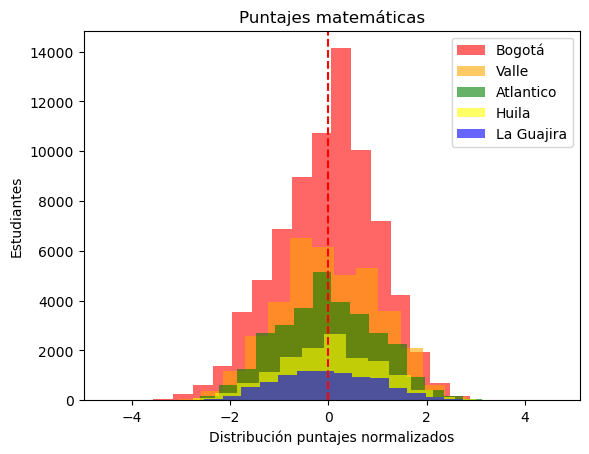

In [118]:
# Grafica de normalizados matematicas
leyenda_dep=['Bogotá', 'Valle','Atlantico','Huila','La Guajira']

plt.hist(df_normalized_1c_bogota_mt['PUNT_MATEMATICAS'],bins=20, alpha=0.6, color='red')
plt.hist(df_normalized_1c_valle_mt['PUNT_MATEMATICAS'], bins=20, alpha=0.6, color='orange')
plt.hist(df_normalized_1c_atlantico_mt['PUNT_MATEMATICAS'], bins=20, alpha=0.6, color='green')
plt.hist(df_normalized_1c_huila_mt['PUNT_MATEMATICAS'], bins=20, alpha=0.6, color='yellow')
plt.hist(df_normalized_1c_guajira_mt['PUNT_MATEMATICAS'], bins=20, alpha=0.6, color='blue')
plt.title('Puntajes matemáticas')
plt.ylabel('Estudiantes')
plt.xlabel('Distribución puntajes normalizados')
plt.legend(leyenda_dep)
plt.axvline(x=0,color='red',linestyle='--', label='Media normalizada')
plt.hist

In [119]:
# curtosis y simetria de puntajes matemáticas
curtosis_bogota_mt = df_normalized_1c_bogota_mt['PUNT_MATEMATICAS'].kurt()
curtosis_valle_mt = df_normalized_1c_valle_mt['PUNT_MATEMATICAS'].kurt()
curtosis_altantico_mt = df_normalized_1c_atlantico_mt['PUNT_MATEMATICAS'].kurt()
curtosis_huila_mt = df_normalized_1c_huila_mt['PUNT_MATEMATICAS'].kurt()
curtosis_guajira_mt = df_normalized_1c_guajira_mt['PUNT_MATEMATICAS'].kurt()

from scipy import stats 
asimetria_bogota_mt = stats.skew(df_normalized_1c_bogota_mt['PUNT_MATEMATICAS'])
asimetria_valle_mt = stats.skew(df_normalized_1c_valle_mt['PUNT_MATEMATICAS'])
asimetria_altantico_mt = stats.skew(df_normalized_1c_atlantico_mt['PUNT_MATEMATICAS'])
asimetria_huila_mt = stats.skew(df_normalized_1c_huila_mt['PUNT_MATEMATICAS'])
asimetria_guajira_mt = stats.skew(df_normalized_1c_guajira_mt['PUNT_MATEMATICAS'])

In [120]:
print(curtosis_bogota_mt,curtosis_valle_mt,curtosis_altantico_mt,curtosis_huila_mt,curtosis_guajira_mt)
print(asimetria_bogota_mt,asimetria_valle_mt,asimetria_altantico_mt,asimetria_huila_mt,asimetria_guajira_mt)

-0.12957602352322573 -0.3621943776285099 -0.36710577912573106 -0.24889037097948385 -0.35049396375666353
-0.21629270709891385 -0.032881538182182535 0.04960355418680233 -0.021278057451344267 0.2132882259030659


Al observar el comportamiento de los cinco departamentos para las pruebas de matemáticas, los departamentos de Bogotá, Valle y Huila presentan una asimetría negativa, mientras que Atlántico y Guajira es positiva con una media por debajo de la global. Al revisar la prueba de curtosis está presenta un comportamiento leptocurtico para todos los departamentos. Teniendo en cuenta el resultado de asimetria, podemos indicar que Bogotá es el departamento que presenta en promedio un mejor desempeño en esta asignatura. 

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

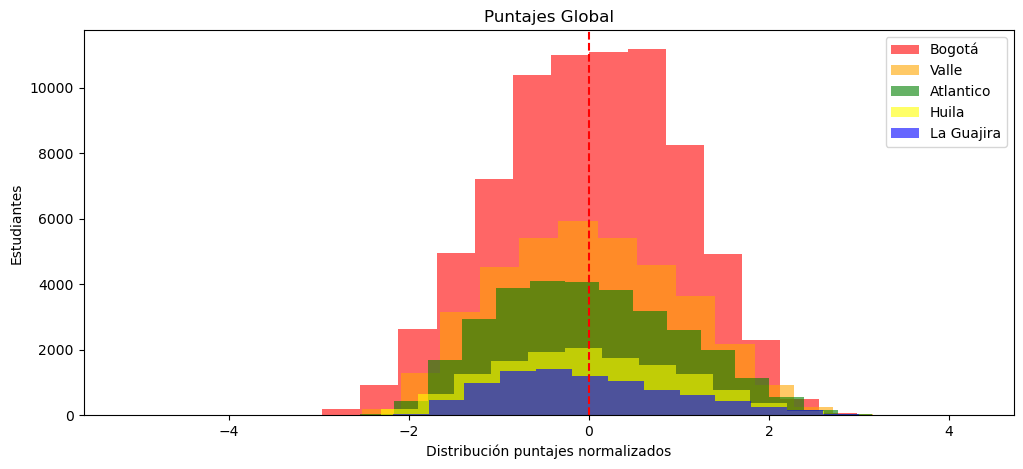

In [83]:
leyenda_dep=['Bogotá', 'Valle','Atlantico','Huila','La Guajira']
plt.figure(figsize=(12, 5))
plt.hist(df_normalized_1c_bogota['PUNT_GLOBAL'],bins=20, alpha=0.6, color='red')
plt.hist(df_normalized_1c_valle['PUNT_GLOBAL'], bins=20, alpha=0.6, color='orange')
plt.hist(df_normalized_1c_atlantico['PUNT_GLOBAL'], bins=20, alpha=0.6, color='green')
plt.hist(df_normalized_1c_huila['PUNT_GLOBAL'], bins=20, alpha=0.6, color='yellow')
plt.hist(df_normalized_1c_guajira['PUNT_GLOBAL'], bins=20, alpha=0.6, color='blue')
plt.title('Puntajes Global')
plt.ylabel('Estudiantes')
plt.xlabel('Distribución puntajes normalizados')
plt.legend(leyenda_dep)
plt.axvline(x=0,color='red',linestyle='--', label='Media normalizada')
plt.hist

In [41]:
#Calculando el valor de la curtosis para cada departamento
curtosis_bogota = df_normalized_1c_bogota['PUNT_GLOBAL'].kurt()
curtosis_valle = df_normalized_1c_valle['PUNT_GLOBAL'].kurt()
curtosis_altantico = df_normalized_1c_atlantico['PUNT_GLOBAL'].kurt()
curtosis_huila = df_normalized_1c_huila['PUNT_GLOBAL'].kurt()
curtosis_guajira = df_normalized_1c_guajira['PUNT_GLOBAL'].kurt()

In [40]:
print(curtosis_bogota,curtosis_valle,curtosis_altantico,curtosis_huila,curtosis_guajira)

-0.4871732945299372 -0.5587358711993504 -0.5797593155421659 -0.5664604717643216 -0.26995022497691545


In [46]:
from scipy import stats 

In [47]:
#Calculando el valor de la asimetría para cada departamento
asimetria_bogota = stats.skew(df_normalized_1c_bogota['PUNT_GLOBAL'])
asimetria_valle = stats.skew(df_normalized_1c_valle['PUNT_GLOBAL'])
asimetria_altantico = stats.skew(df_normalized_1c_atlantico['PUNT_GLOBAL'])
asimetria_huila = stats.skew(df_normalized_1c_huila['PUNT_GLOBAL'])
asimetria_guajira = stats.skew(df_normalized_1c_guajira['PUNT_GLOBAL'])

In [48]:
print(asimetria_bogota,asimetria_valle,asimetria_altantico,asimetria_huila,asimetria_guajira)

-0.10808235810582142 0.12580814157704498 0.23759913337183208 0.14069853961883463 0.49004592506665107


La concentración de los datos en cuanto a los puntajes globales para los departamentos Guajira, Huila, Atlantico y Valle estan concentrados por debado de la media global de 247 con una asimetria positiva. Por otro lado el departamento de Bogotá cuenta con una asimetria negatia. Bogota al tener una mayor cantidad de datos genera un resultado opuesto a los demas departamentos.  

Basados en el calculo de la curtosis para los puntajes globales de cada uno de los cinco departamento se puede observar quienes tienen una mayor concentración de datos hacia la media son Guajira y Bogota (leptocurtica), mientras que los demás tienen una mayor dispersión (platocurtica).

d. (5%) Muestre en una tabla el número de estudiantes que pertenece a colegios oficiales y no oficiales. Ilustre mediante una gráfica. ¿Cree Ud. que los resultados del puntaje global se ven influenciado por el tipo de colegio?

In [71]:
# Implementa tu respuesta en esta celda
df_colegios = df_drop.loc[:,['COLE_NATURALEZA','PUNT_GLOBAL']]
df_colegios_count = df_colegios.groupby(['COLE_NATURALEZA']).count()
print('Cantidad de estudiantes por tipo de colegio')
df_colegios_count

Cantidad de estudiantes por tipo de colegio


,PUNT_GLOBAL
COLE_NATURALEZA,
NO OFICIAL,50881
OFICIAL,115305


In [72]:
#Generando data frames por colegio
df_colegios_oficiales = df_colegios[df_colegios['COLE_NATURALEZA']=='OFICIAL']
df_colegios_oficiales = df_colegios_oficiales.drop(columns=['COLE_NATURALEZA'])
df_colegios_no_oficiales = df_colegios[df_colegios['COLE_NATURALEZA']=='NO OFICIAL']
df_colegios_no_oficiales = df_colegios_no_oficiales.drop(columns=['COLE_NATURALEZA'])
#Normalizando los data frames por colegio
df_normalized_oficiales = pd.DataFrame(scaler.fit_transform(df_colegios_oficiales), columns=df_colegios_oficiales.columns)
df_normalized_no_oficiales = pd.DataFrame(scaler.fit_transform(df_colegios_no_oficiales), columns=df_colegios_no_oficiales.columns)

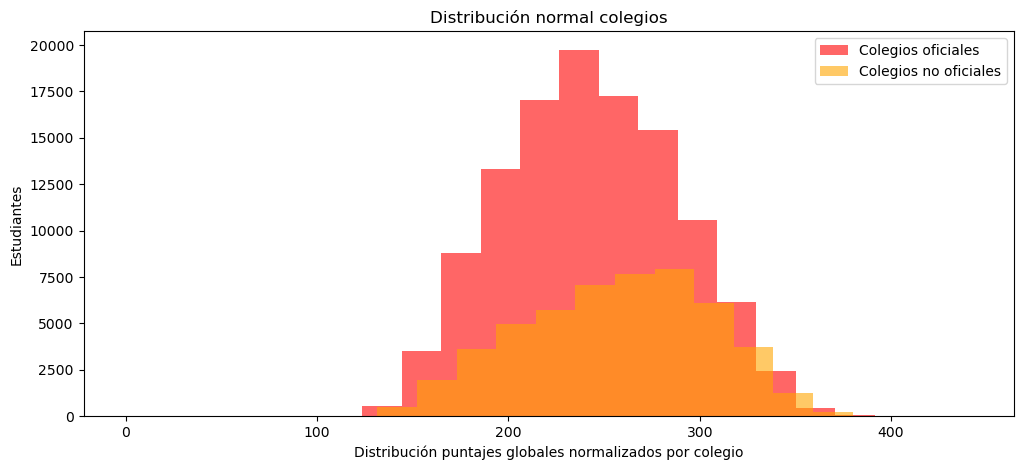

In [85]:
leyenda_colegios = ['Colegios oficiales','Colegios no oficiales']
plt.figure(figsize=(12, 5))
plt.hist(df_colegios_oficiales['PUNT_GLOBAL'],bins=20, alpha=0.6, color='red')
plt.hist(df_colegios_no_oficiales['PUNT_GLOBAL'], bins=20, alpha=0.6, color='orange')
plt.legend(leyenda_colegios)
plt.title('Distribución normal colegios')
plt.ylabel('Estudiantes')
plt.xlabel('Distribución puntajes globales normalizados por colegio')
plt.show()

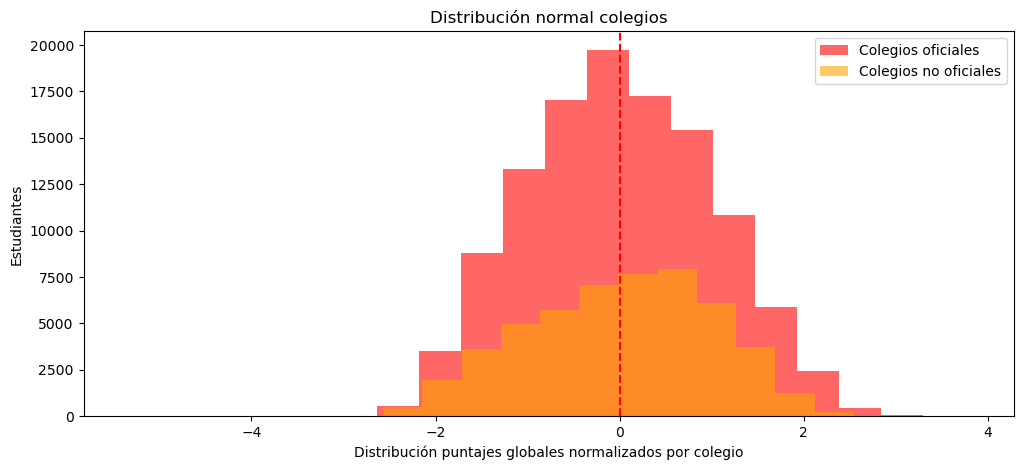

In [84]:
leyenda_colegios = ['Colegios oficiales','Colegios no oficiales']
plt.figure(figsize=(12, 5))
plt.hist(df_normalized_oficiales['PUNT_GLOBAL'],bins=20, alpha=0.6, color='red')
plt.hist(df_normalized_no_oficiales['PUNT_GLOBAL'], bins=20, alpha=0.6, color='orange')
plt.legend(leyenda_colegios)
plt.title('Distribución normal colegios')
plt.ylabel('Estudiantes')
plt.xlabel('Distribución puntajes globales normalizados por colegio')
plt.axvline(x=0,color='red',linestyle='--', label='Media normalizada')
plt.show()

In [86]:
#Calculando el valor de la curtosis para cada colegio
curtosis_oficial = df_normalized_oficiales['PUNT_GLOBAL'].kurt()
curtosis_no_oficial = df_normalized_no_oficiales['PUNT_GLOBAL'].kurt()
print(curtosis_oficial,curtosis_no_oficial)

-0.5303034924159578 -0.656325944255792


In [87]:
#Calculando el valor de la asimetría para cada colegio
asimetria_oficial = stats.skew(df_normalized_oficiales['PUNT_GLOBAL'])
asimetria_no_oficial = stats.skew(df_normalized_no_oficiales['PUNT_GLOBAL'])
print(asimetria_oficial,asimetria_no_oficial)

0.07820275534616597 -0.18147952054221705


e. (5%) ¿Cree usted que hay alguna relación entre el puntaje global y el estrato del 
estudiante? 

In [88]:
# No modifiques esta celda
df_estratos = df_drop.loc[:,['FAMI_ESTRATOVIVIENDA','PUNT_GLOBAL']]
df_estratos_count = df_estratos.groupby(['FAMI_ESTRATOVIVIENDA']).count()
print('Cantidad de estudiantes por estrato')
df_estratos_count

Cantidad de estudiantes por estrato


,PUNT_GLOBAL
FAMI_ESTRATOVIVIENDA,
-,10600
Estrato 1,37954
Estrato 2,64313
Estrato 3,39517
Estrato 4,7210
Estrato 5,1834
Estrato 6,813
Sin Estrato,3945


In [101]:
#Limpiando el dataframe de los estudiantes que no tienen un estrato asignado
drop = ['-','Sin Estrato']   
df_drop_estratos = df_estratos[~df_estratos['FAMI_ESTRATOVIVIENDA'].isin(drop)]
df_drop_estratos_count = df_drop_estratos.groupby(['FAMI_ESTRATOVIVIENDA']).count()
print('Cantidad de estudiantes por estrato')
df_drop_estratos_count

Cantidad de estudiantes por estrato


,PUNT_GLOBAL
FAMI_ESTRATOVIVIENDA,
Estrato 1,37954
Estrato 2,64313
Estrato 3,39517
Estrato 4,7210
Estrato 5,1834
Estrato 6,813


In [104]:
#Generando data frames por estrato
df_estrato_1 = df_drop_estratos[df_drop_estratos['FAMI_ESTRATOVIVIENDA']=='Estrato 1']
df_estrato_1 = df_estrato_1.drop(columns=['FAMI_ESTRATOVIVIENDA'])
df_estrato_2 = df_drop_estratos[df_drop_estratos['FAMI_ESTRATOVIVIENDA']=='Estrato 2']
df_estrato_2 = df_estrato_2.drop(columns=['FAMI_ESTRATOVIVIENDA'])
df_estrato_3 = df_drop_estratos[df_drop_estratos['FAMI_ESTRATOVIVIENDA']=='Estrato 3']
df_estrato_3 = df_estrato_3.drop(columns=['FAMI_ESTRATOVIVIENDA'])
df_estrato_4 = df_drop_estratos[df_drop_estratos['FAMI_ESTRATOVIVIENDA']=='Estrato 4']
df_estrato_4 = df_estrato_4.drop(columns=['FAMI_ESTRATOVIVIENDA'])
df_estrato_5 = df_drop_estratos[df_drop_estratos['FAMI_ESTRATOVIVIENDA']=='Estrato 5']
df_estrato_5 = df_estrato_5.drop(columns=['FAMI_ESTRATOVIVIENDA'])
df_estrato_6 = df_drop_estratos[df_drop_estratos['FAMI_ESTRATOVIVIENDA']=='Estrato 6']
df_estrato_6 = df_estrato_6.drop(columns=['FAMI_ESTRATOVIVIENDA'])

#Normalizando los data frames por estrato
df_normalized_estrato_1 = pd.DataFrame(scaler.fit_transform(df_estrato_1), columns=df_estrato_1.columns)
df_normalized_estrato_2 = pd.DataFrame(scaler.fit_transform(df_estrato_2), columns=df_estrato_2.columns)
df_normalized_estrato_3 = pd.DataFrame(scaler.fit_transform(df_estrato_3), columns=df_estrato_3.columns)
df_normalized_estrato_4 = pd.DataFrame(scaler.fit_transform(df_estrato_4), columns=df_estrato_4.columns)
df_normalized_estrato_5 = pd.DataFrame(scaler.fit_transform(df_estrato_5), columns=df_estrato_5.columns)
df_normalized_estrato_6 = pd.DataFrame(scaler.fit_transform(df_estrato_6), columns=df_estrato_6.columns)


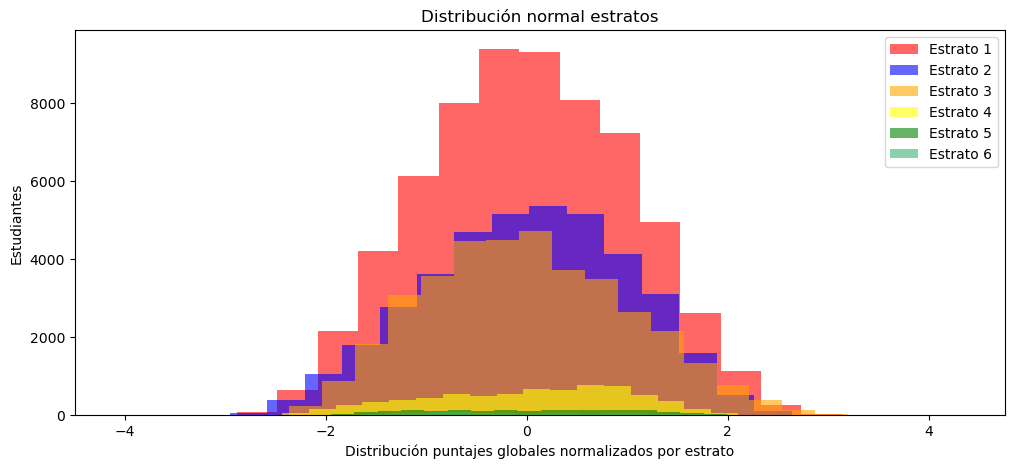

In [113]:
leyenda_estratos = ['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6']
plt.figure(figsize=(12, 5))
plt.hist(df_normalized_estrato_2['PUNT_GLOBAL'],bins=20, alpha=0.6, color='red')
plt.hist(df_normalized_estrato_3['PUNT_GLOBAL'],bins=20, alpha=0.6, color='blue')
plt.hist(df_normalized_estrato_1['PUNT_GLOBAL'],bins=20, alpha=0.6, color='orange')
plt.hist(df_normalized_estrato_4['PUNT_GLOBAL'],bins=20, alpha=0.6, color='yellow')
plt.hist(df_normalized_estrato_5['PUNT_GLOBAL'],bins=20, alpha=0.6, color='green')
plt.hist(df_normalized_estrato_6['PUNT_GLOBAL'],bins=20, alpha=0.6, color='mediumseagreen')
plt.legend(leyenda_estratos)
plt.title('Distribución normal estratos')
plt.ylabel('Estudiantes')
plt.xlabel('Distribución puntajes globales normalizados por estrato')
plt.show()

## Ejercicio 2

(30%) Teniendo en cuenta los resultados obtenidos por los estudiantes en sus pruebas ICFES una academia dedicada a cursos pre-icfes decidió ofertar una variedad de cursos con el fin de lograr que los estudiantes obtengan puntajes mayores a 400 puntos. La academia optó por desarrollar 4 cursos distintos, estos están pensados variando la intensidad de horas de la siguiente manera; intensivo (2 horas díarias), semi-intensivo (4 horas semanales), semanal (5 horas en un solo día) y super intensivo (3 horas diarias).En la base de datos cursos.cvs, encontrara los resultados obtenidos por los estudiantes de acuerdo con el curso tomado. Con base en la información, conteste las siguientes preguntas: <br>

a. (10%) Realice estadísticas descriptivas (promedio, frecuencia, desviación, entre otros) que permitan observar diferencias de los puntajes obtenidos por los estudiantes según el curso tomado y concluya

In [ ]:
# Implementa tu respuesta en esta celda

data_2 = '/Users/santiagoromero/Documents/Maestria/Modelos Analisis Estadisticos/Tareas/Tarea 1 2/Archivos/cursos.csv'
data_frame_cursos = pd.read_csv(data_2, sep=',')
data_frame_cursos.head()

In [ ]:
data_frame_cursos.describe()

In [ ]:
data_frame_cursos.mean()

In [ ]:
descriptivos = data_frame_cursos.groupby(['Tipo de Curso ']).describe()
descriptivos

In [ ]:
descriptivos.columns = descriptivos.columns.droplevel()
descriptivos

b. (10%) Un estudiante que se encuentra indeciso por el curso a tomar considera que el 
curso intensivo y el curso super intensivo no tienen ninguna diferencia. ¿Está de acuerdo 
con esta afirmación?

In [ ]:
# Implementa tu respuesta en esta celda



c. (10%) Uno de los profesores de la academia desea conocer los puntajes promedio de los estudiantes con el fin de establecer estrategias para que algún estudiante tenga un puntaje mayor a 483 que es el mejor de la academia, ¿cree usted que el profesor puede ayudar a sus estudiantes sugiriéndoles que tomen el curso semanal? ¿Qué curso cree usted que debe sugerir el profesor a sus estudiantes teniendo en cuenta los resultados que se han obtenido? <br>

In [ ]:
# Implementa tu respuesta en esta celda



## Ejercicio 3

(30%) Battlife se dedica a la producción de baterías, se sabe la vida útil promedio de sus baterías siguen una distribución normal con una media de 800 horas y una varianza 𝜎2. Un grupo de ingenieros quieren verificar que esta afirmación sea veraz, por lo tanto deciden tomar una muestra aleatoria de 30 baterías con las cuales obtienen que la vida útil promedio es de 790 horas, con una desviación estándar muestral de 50 horas.

a. (10%) ¿Cuál es la probabilidad de que la vida útil promedio real de las baterías sea 
menor a 780 horas?

In [ ]:
# Implementa tu respuesta en esta celda
from scipy.stats import norm
import math

mean_p = 900 
mean_s = 800
std_p = 45
std_s = 50

# Normalizando los datos
z = (780 - mean_p) / std_p
prob = norm.cdf(z)
probabilidad = 1 - prob
print(probabilidad)

(10%) Un comprador está interesado en adquirir un lote de baterías, sin embargo, solicitó que, en una muestra de 40 baterías, la variabilidad de las vidas útiles no debe exceder 5 horas. Calcule la probabilidad de que la varianza de las vidas útiles de una muestra de 40 baterías supere este valor.

In [ ]:
from scipy import stats

In [ ]:
#Implementa tu respuesta en esta celda
'Para resolver el ejercicio primero planteamos la hipotesis nula en la cual establecemos que la variabilidad de la muestra de 40 baterias es igual a 5 horas, mientras que la hipótesis alterna indica que esta variabilidad es superior a 5 horas'

'Ho: s^2 = 25'
'H1: s^2 > 25'

#parametros
n = 40
s_deseada = 25
varianza_muestral = 45**2
grados_libertad = n-1
nivel_significancia = 0.05
valor_critico = stats.chi2.ppf(1 - nivel_significancia, grados_libertad)

ji2 = (grados_libertad*(s_deseada))/varianza_muestral

if ji2 < valor_critico:
        print(f'no se rechaza la hipotesis nula que la variabilidad de la muestra de 40 baterias es igual a 5 horas')

# Probabilidad de que la varianza supere 25 horas
estadistico = stats.chi2.cdf(s_deseada, grados_libertad)
probabilidad = estadistico

print(f'Valor Crítico: {valor_critico}')
print(f'estadistico: {estadistico}')
print(f'Probabilidad: {probabilidad}')

#gráfico
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Rango de valores de chi-cuadrado
x = np.linspace(0, 100, 1000)

# Densidad de probabilidad de chi-cuadrado
pdf = stats.chi2.pdf(x, grados_libertad)

# Estadístico de prueba (chi-cuadrado calculado)
  # Reemplaza esto con el valor real calculado

# Gráfico de la distribución chi-cuadrado
plt.plot(x, pdf, label=f'Chi-cuadrado ({grados_libertad} grados de libertad)')
plt.fill_between(x, pdf, where=(x >= valor_critico), alpha=0.2, label=f'Región de rechazo (α={nivel_significancia})')
plt.axvline(x=valor_critico, color='red', linestyle='--', label='Valor Crítico')
plt.axvline(x=ji2, color='green', linestyle='--', label='Estadístico de Prueba')

# Etiquetas y leyendas
plt.title('Distribución Chi-cuadrado')
plt.xlabel('Valor Chi-cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.text(60, 0.015, f'Valor Crítico: {valor_critico:.2f}', color='red')
plt.text(10, 0.015, f'Estadístico de Prueba: {ji2:.2f}', color='green')
plt.legend()

# Mostrar el gráfico
plt.show()

c. (10%) El área de desarrollo esta haciendo un estudio de mercado dado que desean que las baterías producidas sean las que tengan la mejor vida útil del mercado. Por lo cual, se han obtenido los resultados de una empresa competidora “BattteriesInc”. De “BattteriesInc”. se conoce que la vida útil promedio de las baterías es de 885 horas con una desviación estándar de 30 horas. Se tomó una muestra aleatoria de 20 baterías de Battlife y 15 baterías de BattteriesInc. Asumiendo que las variables aleatorias son independientes, ¿cuál es la probabilidad de que la varianza muestral de la vida útil producida por Battlife menor a la varianza muestral del espesor de la vida útil de BatteriesInc?

In [ ]:
# Implementa tu respuesta en esta celda

# Varianzas poblacionales conocidas
varianza_battlife = 45**2  # Varianza poblacional de Battlife (sigma^2)
varianza_batteriesinc = 30**2  # Varianza poblacional de BatteriesInc (sigma^2)

#Prueba de hipotesis:
# Ho: Varianza_battlife > varianza_batteriesinc
# H1: varianza_battlife < varianza_batteriesinc

# Nivel de significancia
alpha = 0.05

# Estadístico de prueba F
F = varianza_batteriesinc / varianza_battlife

# Grados de libertad
v_1 = 1  # Grados de libertad para Battlife
v_2 = 1  # Grados de libertad para BatteriesInc

# Valor crítico de la distribución F
valor_critico = stats.f.ppf(1 - alpha, v_1, v_2)

# Realizar la prueba de hipótesis
if F < valor_critico:
    resultado = "No se rechaza la hipótesis nula. La varianza de Battlife es mayor que la de BatteriesInc."
else:
    resultado = "Se rechaza la hipótesis nula. La varianza de Battlife es menor a la de BatteriesInc"
# Imprimir el resultado
print(F)
print(valor_critico)
print('como el valor de la prueba F es menor al valor de la región critica, no se rechaza la hipótesis nula y por lo tanto no es posible concluir que la varianza de las baterias de Battlife es menor a las de BatteriesInc')
print(resultado)



#probabilidad

valor_p = 1 - stats.f.cdf(F, v_1, v_2)

print("Valor p:", valor_p)

## Créditos

__Autores__: Laura Valentina Diaz Pinzon

__Actualizado por__: Alejandra Tabares Pozos. 

__Fecha última actualización__: 01/09/2023